# Исследование продаж компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


**Цель исследования:**

1. Выявить закономерности, определяющие успешность продаж игры 
2. Определить потенциально популярный продукт и составить прогноз для кампании на 2017 год

**Ход исследования:**

- Обзор и предобработка данных
- Расчеты и добавление их в таблицу
- Проведение анализа для регионов (NA, EU, JP)
- Оценка факторов, влияющих на продажи
- Общий вывод


### Обзор данных

**Описание данных:** 

*Name* — название игры

*Platform* — платформа

*Year_of_Release* — год выпуска

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий)

*Other_sales* — продажи в других странах (миллионы проданных копий)

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


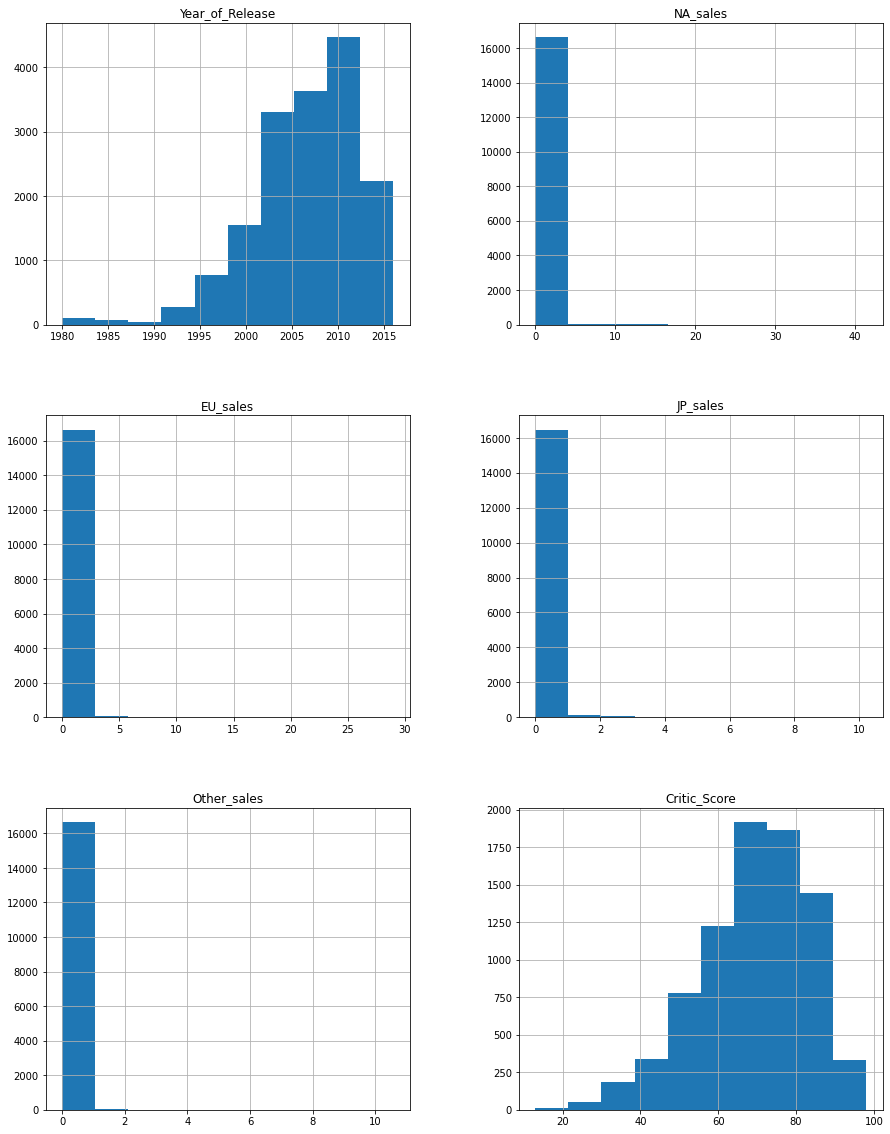

In [4]:
data.hist(figsize=(15, 20)); 

### Подготовка данных

#### Предобработка данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим названия стобцов:

In [6]:
        
data.columns = data.columns.str.lower() 

В столбцах "name" и "genre" приведем названия к нижнему регистру:

In [7]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#смотрим общее кол-во строк
len(data) 

16715

In [9]:
 #ищем пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
#проверим количество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') 

In [11]:
#посмотрим уникальные знаечния в столбцах с пропусками
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Всего в таблице 16 715 строк, выявлены следующие пропуски:**

**name** - 2 пропуска, что также нематериально значимо, удалим эти строки;

**year_of_release** - всего 269 пропусков, что составляет 2% от всех данных - скорее всего их просто забыли заполнить, можно удалить эти строки;

**genre** - 2 пропуска, что также нематериально значимо, удалим эти строки;

**critic_score** - 8578 пропусков или 51%;

**user_score** - 6701 пропусков или 40%. При выводе уникальных значений видим "tbd", что означает "To Be Decided", заменим "tbd"  на nan;

В столбцах **critic_score**, **user_score** много пропущенных значений, имеет смысл заменить пропуски медианным значением, поскольку они могут повлиять на дальнейшую аналитику. Пропуски могли возникнуть в связи с отсутствием оценок (неоценненые игры), например, если игра вышла недавно.

**rating** - 6766 пропусков или 40%, что существенно, пока что заполним пропуски "no_rating".

---

**Анализ типов рейтинга:**

*«E» («Everyone»)* — «Для всех», по данным из открытых источников ранее называлась "K-A" ("Kids to Adults") - можем произвести замену для унификации данных;

*«M» («Mature»)* — «Для взрослых»;

*«T» («Teen»)* — «Подросткам»;

*«E10+» («Everyone 10 and older»)* — «Для всех от 10 лет и старше»;

*«AO» («Adults Only 18+»)* — «Только для взрослых»;

*«EC» («Early childhood»)* — «Для детей младшего возраста»;

*«RP» («Rating Pending»)* — «Рейтинг ожидается».


In [16]:
data = data.dropna(subset = ['name'])
data = data.dropna(subset = ['year_of_release'])
data = data.dropna(subset = ['genre'])

In [17]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [18]:
data.loc[data['user_score']=="tbd", 'user_score']=np.nan
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
#изменим тип данных перед расчетом медианы
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)
#проверяем изменение типов
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
#оставляем пропуски
#data['critic_score'] = data['critic_score'].fillna(data['critic_score'].median()) оставляем пропуски
#data['user_score'] = data['user_score'].fillna(data['user_score'].median())
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [21]:
data['rating'] = data['rating'].str.replace('K-A', 'E')

In [22]:
data['rating'] = data['rating'].fillna('no_rating')
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
#сбросим индексы
data.reset_index() 

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating
16440,16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating
16441,16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating
16442,16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating


Также проверим наличие явных дубликатов:

In [24]:
data.duplicated().sum()

0

In [25]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


#### Добавление новых данных в таблицу
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [26]:
# na_sales, eu_sales, jp_sales - в миллионах проданных копий
data['total_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


**Промежуточный вывод.** 

**Итоги подготовки данных:**

На этой стадии я подготовила данные к дальнейшему проведению анализа. Что было сделано:

- названия столбцов приведины к нижнему регистру;

- преобразованы данные в нужные типы: **year_of_release** тип данных изменен на int, **critic_score** и **user_score** - на float;

- для корректного анализа данных были удалены строки с пропусками в **name**, **year_of_release**, **genre**, поскольку количество пропусков было менее 2%, что незначительно; 

- **critic_score**, **user_score**, **rating** было выявлено значительное количество пропусков (от 40 до 50% от всех данных), удалить их было бы неправильно, поэтому пропуски были заполнены: для **critic_score** и **user_score** медианным значением; 

- для **rating** пропуски заполненны значением-заглушкой "no_rating";

- посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец "sum_sales".



### Исследовательский анализ данных

#### Анализ продаж по платформам, оценкам пользователей и критиков, по жанрам

Сгруппируем данные по годам:

In [28]:
#сумма игр по годам
statistic_games_1 = data.groupby('year_of_release')['name'].count()

In [29]:
statistic_games_1

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

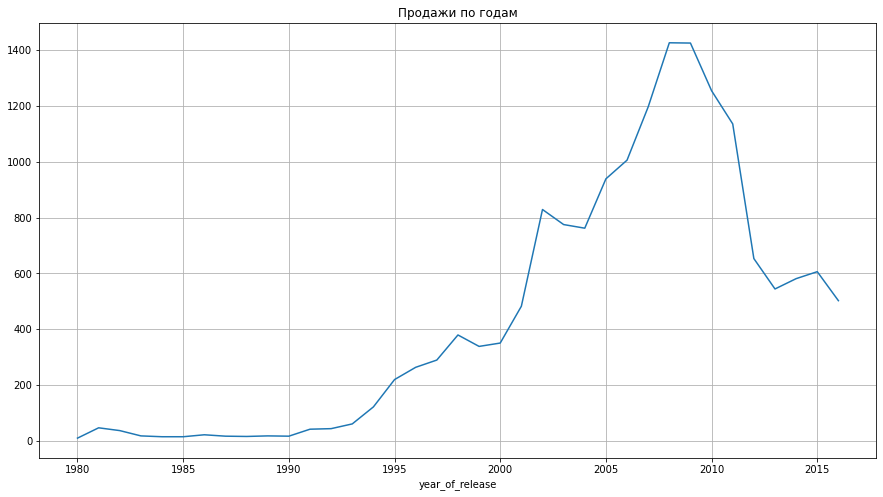

In [30]:
statistic_games_1.plot(title = 'Продажи по годам', grid=True, figsize=(15, 8));

С 1980 по 1994 продаж немного, что объясняется развитием индустрии и технологий.
С 1995 виден заметный рост продаж игр, а в 2006 продажи перевалили за 1000 млн копий - такая динамика сохраняется до 2012 года, после чего призошел спад.

Для анализа и статистики возьмем 2012-2016 годы, поскольку продажи до 2012 года слишком высокие и будут искажать реальность. Для этого сделаем срез:

In [31]:
df_2012_2016 = data.query("2012 <= year_of_release <= 2016")

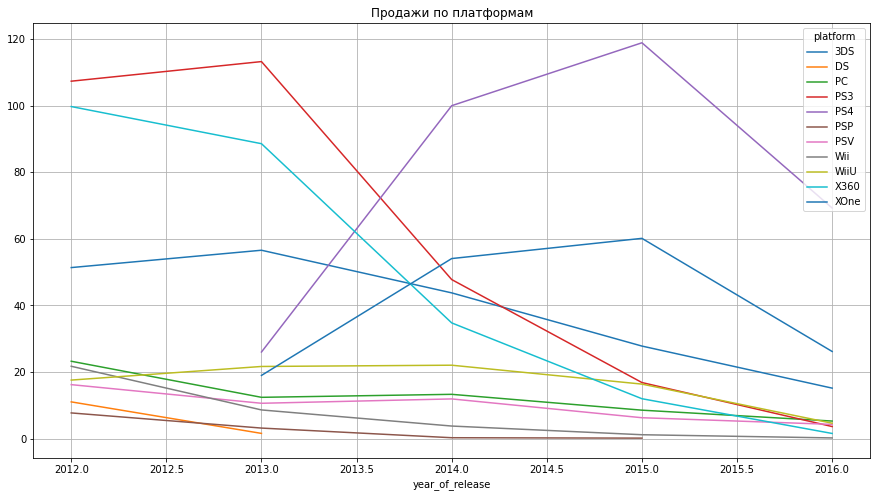

In [32]:
df_2012_2016.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum',\
                ).plot(title = 'Продажи по платформам', grid=True, figsize=(15, 8));

На графике видна основная тенденция – проаджи игр для всех платформ планомерно снижаются, к 2016 году игры для некоторых платформ и вовсе перестают выпускаться. График получился очень "шумным", чтобы он был более наглядным, сделаю еще один срез за последние 2 года и построю по нему аналогичный график:

In [33]:
df_2015_2016 = data.query("2015 <= year_of_release <= 2016")

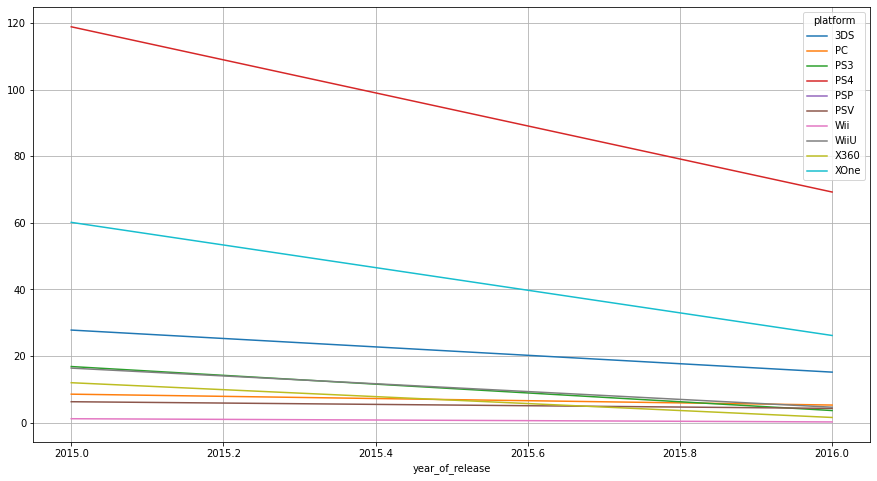

In [34]:
df_2015_2016.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum',\
                ).plot(grid=True, figsize=(15, 8));

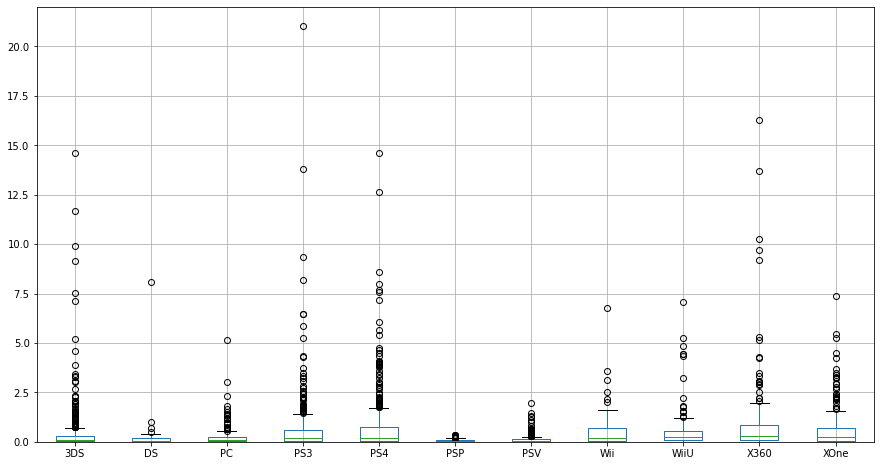

In [35]:
df_2012_2016.pivot_table(index = 'name', columns = 'platform', values = 'total_sales',\
                 aggfunc = 'sum').plot(kind='box', ylim=(0,22), grid=True, figsize=(15,8));

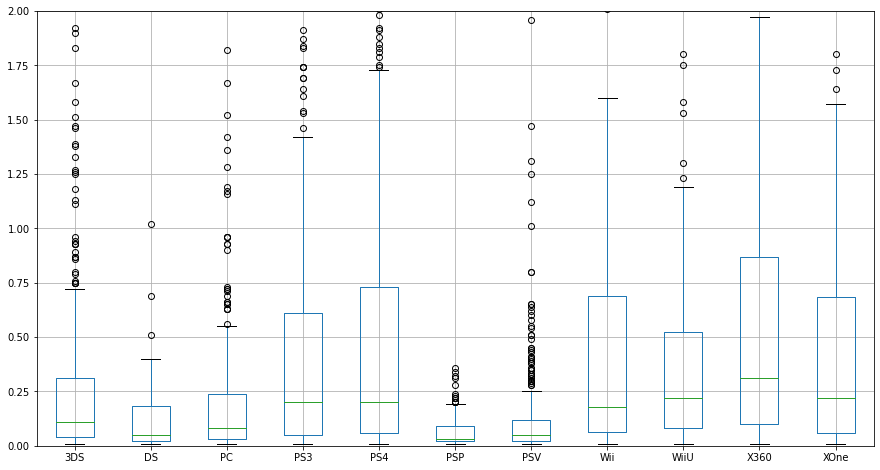

In [36]:
df_2012_2016.pivot_table(index = 'name', columns = 'platform', values = 'total_sales',\
                 aggfunc = 'sum').plot(kind='box', ylim=(0,2), grid=True, figsize=(15,8));

По графикам выше в целом наблюдается тенденция снижения продаж. Наиболее высокие продажи у PS4, XOne и 3DS - можно сделать промежуточный вывод, что это потнециально прибыльные платформы. 

На диаграмме размаха видно, что медианные значения у PS4, XOne практически совпадают.

Теперь посмотрми как влияют на продажи отзывы пользователей и критиков на примере одной популярной платформы - PS4.
Построим диаграмму рассеяния:

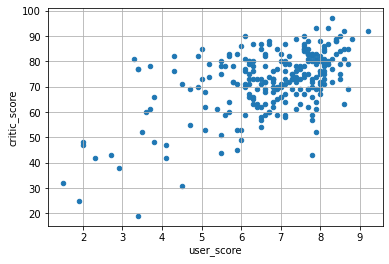

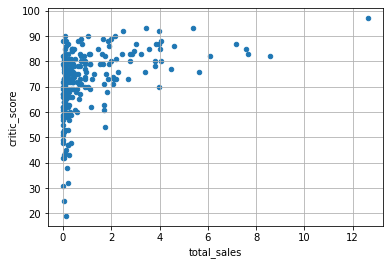

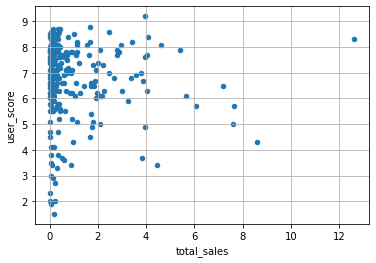

In [37]:
df_ps4 = df_2012_2016.query('platform == "PS4"')
df_ps4.plot(x='user_score', y='critic_score', kind='scatter', grid=True)
df_ps4.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
df_ps4.plot(x='total_sales', y='user_score', kind='scatter', grid=True);

In [38]:
df_ps4 = df_ps4[['critic_score','user_score', 'total_sales']]
df_ps4.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


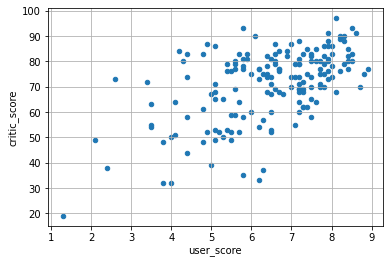

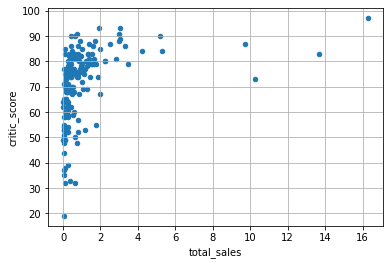

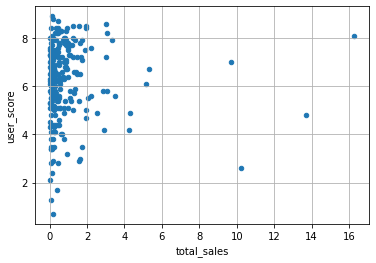

In [39]:
df_x360 = df_2012_2016.query('platform == "X360"')
df_x360.plot(x='user_score', y='critic_score', kind='scatter', grid=True)
df_x360.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
df_x360.plot(x='total_sales', y='user_score', kind='scatter', grid=True);

In [40]:
df_x360 = df_x360[['critic_score','user_score', 'total_sales']]
df_x360.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
total_sales,0.360573,0.006164,1.000000


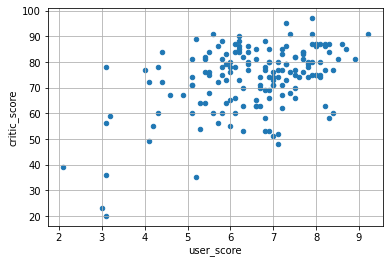

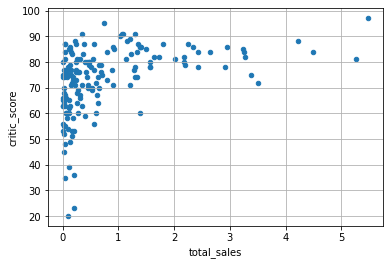

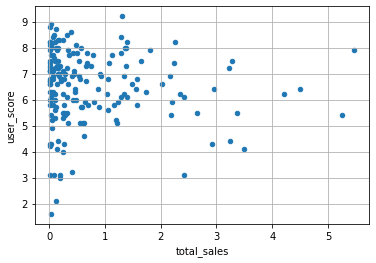

In [41]:
df_xOne = df_2012_2016.query('platform == "XOne"')
df_xOne.plot(x='user_score', y='critic_score', kind='scatter', grid=True)
df_xOne.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
df_xOne.plot(x='total_sales', y='user_score', kind='scatter', grid=True);

In [42]:
df_xOne = df_xOne[['critic_score','user_score', 'total_sales']]
df_xOne.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


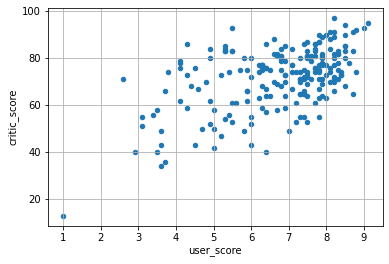

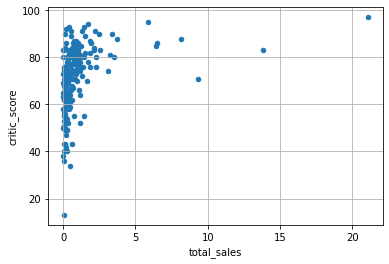

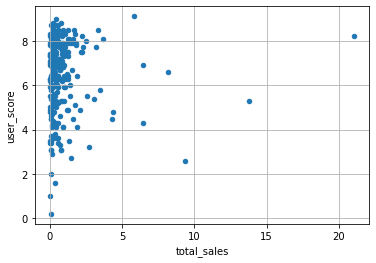

In [43]:
df_ps3 = df_2012_2016.query('platform == "PS3"')
df_ps3.plot(x='user_score', y='critic_score', kind='scatter', grid=True)
df_ps3.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
df_ps3.plot(x='total_sales', y='user_score', kind='scatter', grid=True);

In [44]:
df_ps3 = df_ps3[['critic_score','user_score', 'total_sales']]
df_ps3.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
total_sales,0.331497,-0.005144,1.000000


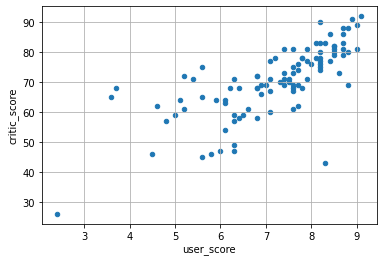

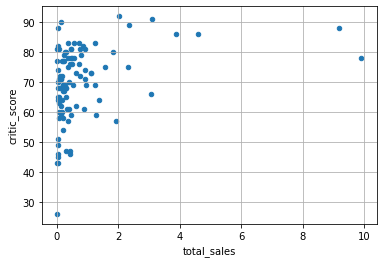

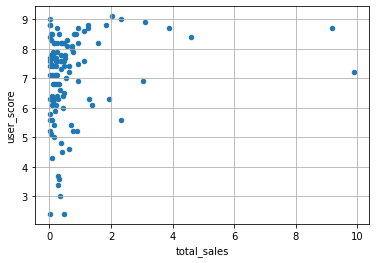

In [45]:
df_3ds = df_2012_2016.query('platform == "3DS"')
df_3ds.plot(x='user_score', y='critic_score', kind='scatter', grid=True)
df_3ds.plot(x='total_sales', y='critic_score', kind='scatter', grid=True)
df_3ds.plot(x='total_sales', y='user_score', kind='scatter', grid=True);

In [46]:
df_3ds = df_3ds[['critic_score','user_score', 'total_sales']]
df_3ds.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


Мы посмотрели на диграммы рассеяния с оценками критиков/пользовататлей по 5-ти платформам: PS4, X360, XOne, PS3, 3DS.

По диаграммам рассеяния видно, что оценки критиков и пользователей в целом совпадают. 

Для дополнительного анализа зависимости продаж и оценок посчитали корреляцию между отзывами и продажами: по таблицам можно сказать, что оценки игроков не влияют на покупателей (коррекляция во всех случаях отрицательная), а оценки критиков - принимают во внимание (корреляция слабо положительная).

In [48]:
df_2012_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,pokemon x/pokemon y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,call of duty: black ops ii,PS3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [49]:
genre_analysis = df_2012_2016.pivot_table(index = 'genre', values = 'total_sales',\
                         aggfunc = ['sum','mean', 'median'])
genre_analysis.columns=['genre_sales_sum','genre_sales_mean','genre_sales_median']

In [50]:
genre_analysis = genre_analysis.sort_values(by=(['genre_sales_mean']), ascending=False)
genre_analysis

,genre_sales_sum,genre_sales_mean,genre_sales_median
genre,,,
shooter,304.73,1.296723,0.440
platform,61.00,0.717647,0.210
sports,181.07,0.675634,0.240
role-playing,192.80,0.521081,0.140
racing,53.50,0.465217,0.140
misc,85.04,0.442917,0.120
simulation,35.12,0.439000,0.120
action,441.12,0.427856,0.120
fighting,44.49,0.408165,0.130


In [51]:
#Решила закомментировать, поскольку диаграммы повторяют данные в таблице выше
#genre_analysis.plot(kind='pie', figsize=(8,8), y='genre_sales_mean', autopct='%1.0f%%');
#genre_analysis.plot(kind='pie', figsize=(8,8), y='genre_sales_median', autopct='%1.0f%%');

Исходя из анализа средних величин и медиан, мы видим, что несмотря на большие объемы продаж игр жанра action, по среднему значению этот жанр не входит даже в топ-5. В то время как наиболее популярные жанры: shooter, platform, sports, а наименее популярные – strategy, pazzle, adventure.

#### Анализ продаж по регионам

**Из описания задания** - необхождимо определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

- Самые популярные жанры (топ-5). Поясните разницу.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?



Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы:

In [52]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


In [53]:
platform_na_sales = df_2012_2016.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum',\
                                            ).sort_values(by=(['na_sales']), ascending=False)
platform_na_sales

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


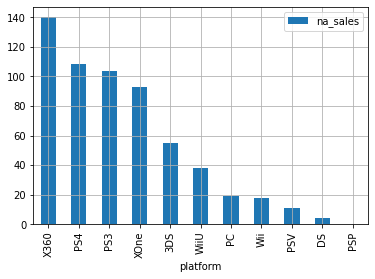

In [54]:
platform_na_sales.plot(kind='bar', grid=True);

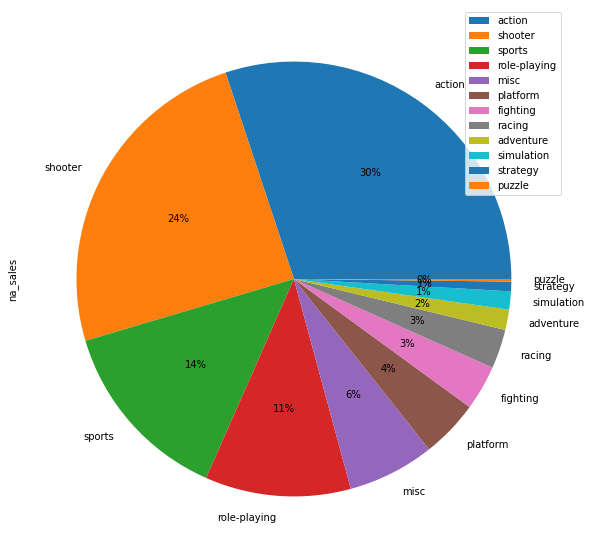

In [55]:
df_2012_2016.pivot_table(index = 'genre', values = 'na_sales',\
                         aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales',\
                                                     ).plot(kind='pie', figsize=(10,10), y='na_sales', autopct='%1.0f%%');

В Северной Америке наиболее популярные платформы - X360, PS4, PS3, XOne, 3DS, наименее популярная - PSP. Наиболее популярные жанры: action, shooter, sports, role-playing, misc.

In [56]:
platform_eu_sales = df_2012_2016.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum',\
                                            ).sort_values(by=(['eu_sales']), ascending=False)
platform_eu_sales

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


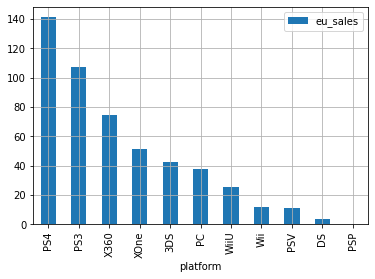

In [57]:
platform_eu_sales.plot(kind='bar', grid=True);

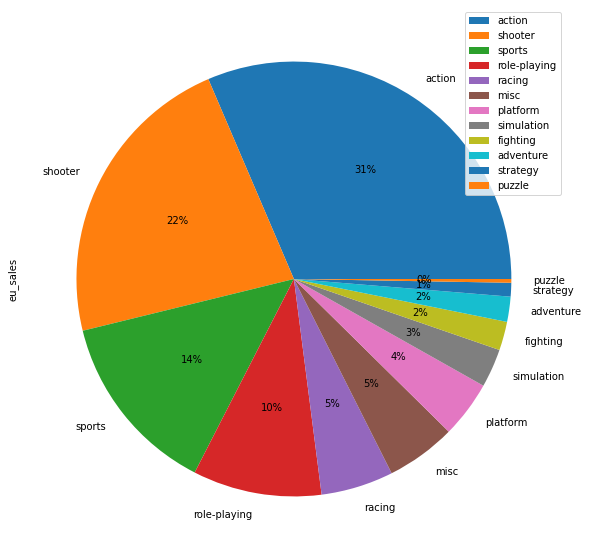

In [58]:
df_2012_2016.pivot_table(index = 'genre', values = 'eu_sales',\
                         aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales',\
                                                     ).plot(kind='pie', figsize=(10,10), y='eu_sales', autopct='%1.0f%%');

 В Европе наиболее популярнаые платформы - PS4, PS3, X360, XOne, 3DS, наименее популярная аналогично Сервной Америке - PSP. Наиболее популярные жанры: action, shooter, sports, role-playing, racing.

In [59]:
platform_jp_sales = df_2012_2016.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum',\
                                            ).sort_values(by=(['jp_sales']), ascending=False)
platform_jp_sales

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


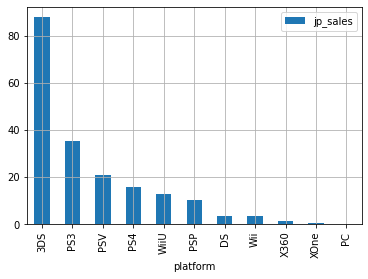

In [60]:
platform_jp_sales.plot(kind='bar', grid=True);

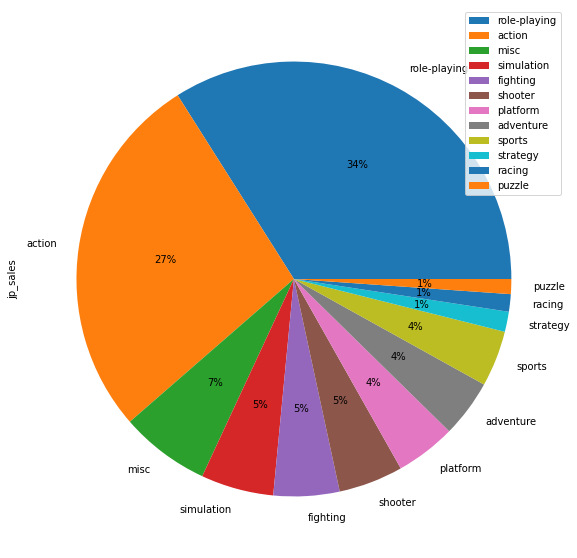

In [61]:
df_2012_2016.pivot_table(index = 'genre', values = 'jp_sales',\
                         aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales',\
                                                     ).plot(kind='pie', figsize=(10,10), y='jp_sales', autopct='%1.0f%%');

В Японии наиболее популярные платформы - 3DS, PS3, PSV, PS4, WiiU, наименее популярная - PC. Наиболее популярные жанры: role-playing, action, misc, simulation, fighting.

Посмотрим влияет ли рейтинг ESRB на продажи в разных регионах:

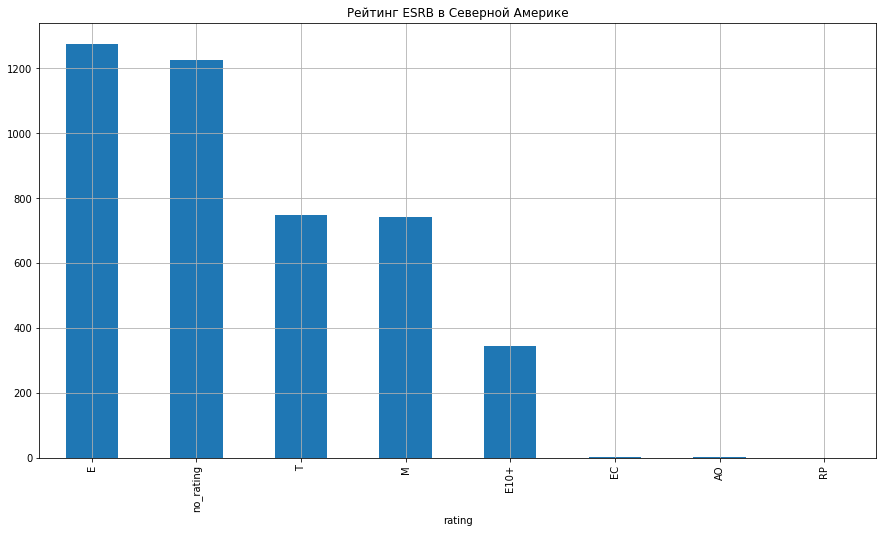

In [65]:
esrb_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_na.plot(kind = 'bar', title = 'Рейтинг ESRB в Северной Америке', grid=True, figsize=(15, 8));

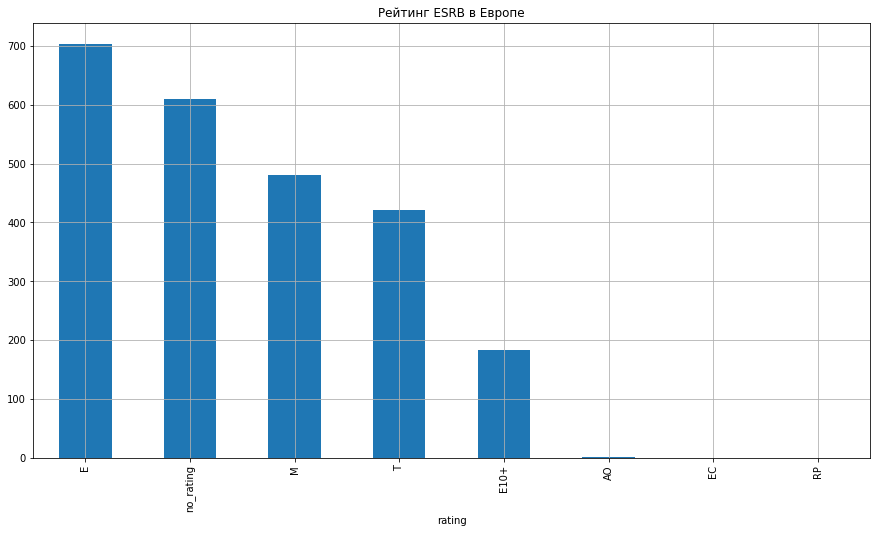

In [66]:
esrb_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_eu.plot(kind = 'bar', title = 'Рейтинг ESRB в Европе', grid=True, figsize=(15, 8));

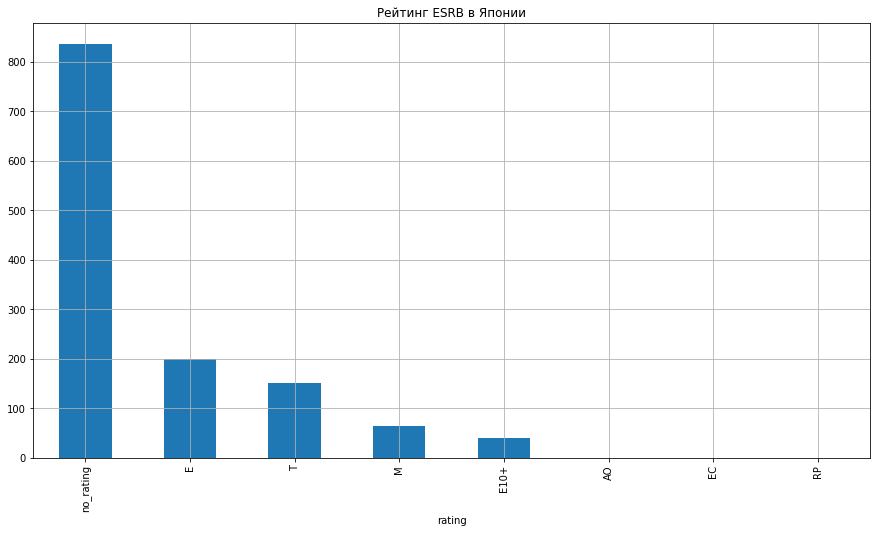

In [67]:
esrb_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
esrb_jp.plot(kind = 'bar', title = 'Рейтинг ESRB в Японии', grid=True, figsize=(15, 8));

In [68]:
esrb = df_2012_2016.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
no_rating,91.50,108.84,103.31


Можно сделать вывод, что рейтинг влияет на продажи. Например, в США и Европе больше всего продаются игры с рейтингом "M" ("Mature"), а в Японии - новые игры без рейтинга.

#### Проверка гипотез

Проверим гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Задайте самостоятельно пороговое значение alpha.

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сформулирую нулеую и альтернативную гипотезы:
- H0: средние рейтинги по платформам одинаковые
- H1: средние рейтинги по платформам разные

Критический уровень статистической значимости возьму = 0.05

In [71]:
df_XOne = df_2012_2016[(df_2012_2016['platform'] == 'XOne') & (df_2012_2016['user_score'] != 0)]['user_score']
df_PC = df_2012_2016[(df_2012_2016['platform'] == 'PC') & (df_2012_2016['user_score'] != 0)]['user_score']
print('средний пользовательский рейтинг по платформе XOne:', df_XOne.mean())
print('средний пользовательский рейтинг по платформе PC:', df_PC.mean())

средний пользовательский рейтинг по платформе XOne: 6.521428571428572
средний пользовательский рейтинг по платформе PC: 6.428640776699029


In [72]:
alpha = 0.05

results = st.ttest_ind(df_XOne, df_PC, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**Вывод:** средние пользовательские рейтинги платформ XOne и PC одинаковые.

Для проверки гипотезы "cредние пользовательские рейтинги жанров Action и Sports разные" сформулирую нулеую и альтернативную гипотезы:

- H0: средние рейтинги жанров одинаковые
- H1: средние рейтинги жанров разные

In [73]:
df_action = df_2012_2016[(df_2012_2016['genre'] == 'action') & (df_2012_2016['user_score'] != 0)]['user_score']
df_sports = df_2012_2016[(df_2012_2016['genre'] == 'sports') & (df_2012_2016['user_score'] != 0)]['user_score']
print('средний пользовательский рейтинг по жанру Action:', df_action.mean())
print('средний пользовательский рейтинг по жанру Sports:', df_sports.mean())

средний пользовательский рейтинг по жанру Action: 6.825047801147227
средний пользовательский рейтинг по жанру Sports: 5.455897435897437


In [74]:
alpha = 0.05

results = st.ttest_ind(df_action, df_sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**Вывод:** средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

Для анализа был выбран самый репрезентативный период: с 2012 по 2016 год.

Исходя из анализа продаж за выбранный период можно сделать вывод о том, что общая тенденция - это снижение продаж игр для всех платформ, в связи с развитием индустрии игры для некоторых платформ и вовсе пропадают из продажи. Наиболее высоки продажи **PS4, XOne и 3DS** - их можно рассматривать как потенциально прибыльные платформы.

Анализ оценок игр показал, что в целом оценки критиков и пользователей совпадают, однако, оценки пользователей почти не влияют на продажи игр, тогда как к оценкам критиков покупатели прислушиваются. 

---

Анализ продаж по регионам говорит о том, что в США и Европе вкусы пользователей практически совпадают - в топ-5 популярных платформ входят **X360, PS4, PS3, XOne и 3DS**, а наименее популярная - **PSP**. Аналогичная ситуация и с жанрами ирг, который предпочитают покупать пользователи, в топ продаваемых жанров входят: **action, shooter, sports, role-playing**, так же **misc и racing** в США и Европе соответственно. 

При этом, в Японии наиболее популярные платформы - **3DS, PS3, PSV, PS4, WiiU**, а наименне популярная - **PC**. Жанры игр также различаются, на первом месте **role-playing**, а также в список популярных входят - **action, misc, simulation, fighting**. 

---

Также на продажи оказывает влияние рейтинг организации ESRB*, так, например, в США и Европе лучше всего продаются игры для взросылх с рейтингом **"M" ("Mature")**, на втором месте игры для всех с рейтингом - **"Е"("Everyone")**, в том время как в Японии больше всего продаж игр **без рейтинга**. 


Таким образом, при планировании кампании на 2017 год необходимо учитывать предпочтения потенциальной целевой аудитории - у жителей западных и восточных стран они разные. Необходимо учесть платформы, для которых выпускают игры, жанры игр и их рейтинг - как оценки критиков, так и рейтинг рорганизации ESRB.

*Определение из открытых источников: **Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.*